In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sal_hike=pd.read_csv("Salary_Data.csv")

In [3]:
sal_hike.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
sal_hike.shape

(30, 2)

In [5]:
sal_hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x2171b8b4f70>,
 'caps': [<matplotlib.lines.Line2D at 0x2171b8ce670>,
 'boxes': [<matplotlib.lines.Line2D at 0x2171b8b4c10>],
 'medians': [<matplotlib.lines.Line2D at 0x2171b8ced30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2171b8da0d0>],
 'means': []}

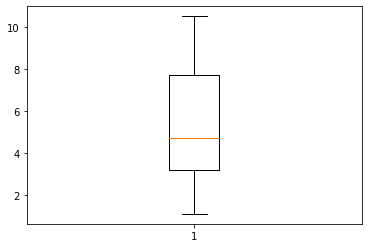

In [6]:
plt.boxplot(sal_hike.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x2171b99aeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2171b9a75b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2171b99ab50>],
 'medians': [<matplotlib.lines.Line2D at 0x2171b9a7c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2171b9a7fd0>],
 'means': []}

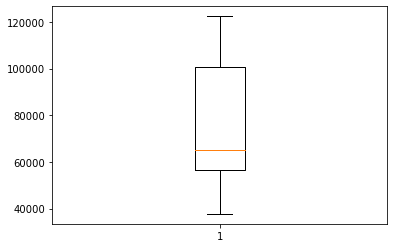

In [7]:
plt.boxplot(sal_hike.Salary)

In [8]:
sal_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


(array([3., 1., 1., 1., 5., 2., 3., 1., 0., 0., 2., 0., 1., 1., 1., 1., 2.,
        2., 1., 2.]),
 array([ 37731.,  41964.,  46197.,  50430.,  54663.,  58896.,  63129.,
         67362.,  71595.,  75828.,  80061.,  84294.,  88527.,  92760.,
         96993., 101226., 105459., 109692., 113925., 118158., 122391.]),
 <BarContainer object of 20 artists>)

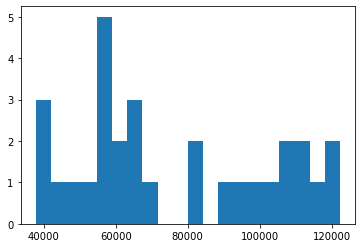

In [9]:
plt.hist(sal_hike.Salary, bins=20)

Text(0, 0.5, 'Salary')

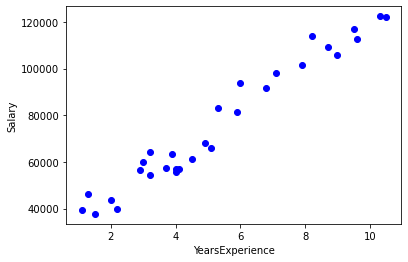

In [10]:
plt.scatter(x=sal_hike.YearsExperience, y=sal_hike.Salary, color='blue')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [19]:
import statsmodels.formula.api as smf
model6=smf.ols("Salary~YearsExperience",data=sal_hike).fit()

In [20]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 20 May 2021   Prob (F-statistic):           1.14e-20
Time:                        23:32:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model7=smf.ols("Salary~np.log(YearsExperience)",data=sal_hike).fit()

In [22]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 20 May 2021   Prob (F-statistic):           3.25e-13
Time:                        23:33:38   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model6.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [26]:
model7.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [27]:
model6.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [28]:
pred6 = model6.predict(sal_hike) # Predicted values of Salary using the model

Text(0, 0.5, 'Salary')

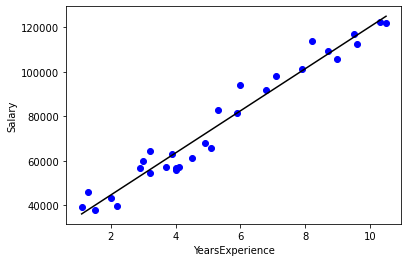

In [29]:
plt.scatter(x=sal_hike.YearsExperience, y=sal_hike.Salary, color='blue')
plt.plot(sal_hike.YearsExperience, pred6,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [32]:
model7.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,4365.921305,25490.022235
np.log(YearsExperience),34083.511736,47080.464184


In [30]:
pred7 = model7.predict(sal_hike) # Predicted values of Salary using the model

Text(0, 0.5, 'Salary')

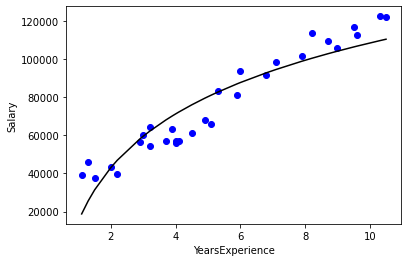

In [31]:
plt.scatter(x=sal_hike.YearsExperience, y=sal_hike.Salary, color='blue')
plt.plot(sal_hike.YearsExperience, pred7,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")